In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target.shape

(569,)

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
x=data.data
y=data.target

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target, test_size=0.33)

In [15]:
N, D=x_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#model=tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

r=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=120)

print("Train score: ",model.evaluate(x_train,y_train))
print("Test score: ",model.evaluate(x_test,y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/120
381/381 [==============================] - 1s 3ms/sample - loss: 0.9949 - accuracy: 0.3543 - val_loss: 1.0420 - val_accuracy: 0.3617
Epoch 2/120
381/381 [==============================] - 0s 194us/sample - loss: 0.9074 - accuracy: 0.4121 - val_loss: 0.9599 - val_accuracy: 0.3883
Epoch 3/120
381/381 [==============================] - 0s 196us/sample - loss: 0.8298 - accuracy: 0.4987 - val_loss: 0.8882 - val_accuracy: 0.4787
Epoch 4/120
381/381 [==============================] - 0s 202us/sample - loss: 0.7633 - accuracy: 0.5932 - val_loss: 0.8247 - val_accuracy: 0.5372
Epoch 5/120
381/381 [==============================] - 0s 215us/sample - loss: 0.7063 - accuracy: 0.6614 - val_loss: 0.7686 - val_accuracy: 0.5851
Epoch 6/120
381/381 [==============================] - 0s 233us/sample - loss: 0.6556 - accuracy: 0.6982 - val_loss: 0.7211 - val_accuracy: 0.6277
Epoch 7/120
381/381 [==============================] - 0s 225us/sample - l

381/381 [==============================] - 0s 188us/sample - loss: 0.1589 - accuracy: 0.9396 - val_loss: 0.1885 - val_accuracy: 0.9362
Epoch 57/120
381/381 [==============================] - 0s 188us/sample - loss: 0.1568 - accuracy: 0.9423 - val_loss: 0.1860 - val_accuracy: 0.9362
Epoch 58/120
381/381 [==============================] - 0s 181us/sample - loss: 0.1548 - accuracy: 0.9423 - val_loss: 0.1837 - val_accuracy: 0.9362
Epoch 59/120
381/381 [==============================] - 0s 186us/sample - loss: 0.1530 - accuracy: 0.9423 - val_loss: 0.1814 - val_accuracy: 0.9362
Epoch 60/120
381/381 [==============================] - 0s 186us/sample - loss: 0.1510 - accuracy: 0.9449 - val_loss: 0.1792 - val_accuracy: 0.9362
Epoch 61/120
381/381 [==============================] - 0s 207us/sample - loss: 0.1493 - accuracy: 0.9449 - val_loss: 0.1771 - val_accuracy: 0.9362
Epoch 62/120
381/381 [==============================] - 0s 181us/sample - loss: 0.1475 - accuracy: 0.9475 - val_loss: 0.1750 

381/381 [==============================] - 0s 186us/sample - loss: 0.0993 - accuracy: 0.9764 - val_loss: 0.1251 - val_accuracy: 0.9521
Epoch 112/120
381/381 [==============================] - 0s 202us/sample - loss: 0.0987 - accuracy: 0.9764 - val_loss: 0.1247 - val_accuracy: 0.9521
Epoch 113/120
381/381 [==============================] - 0s 178us/sample - loss: 0.0982 - accuracy: 0.9764 - val_loss: 0.1241 - val_accuracy: 0.9521
Epoch 114/120
381/381 [==============================] - 0s 194us/sample - loss: 0.0977 - accuracy: 0.9764 - val_loss: 0.1236 - val_accuracy: 0.9521
Epoch 115/120
381/381 [==============================] - 0s 181us/sample - loss: 0.0971 - accuracy: 0.9764 - val_loss: 0.1233 - val_accuracy: 0.9521
Epoch 116/120
381/381 [==============================] - 0s 194us/sample - loss: 0.0966 - accuracy: 0.9764 - val_loss: 0.1228 - val_accuracy: 0.9521
Epoch 117/120
381/381 [==============================] - 0s 188us/sample - loss: 0.0961 - accuracy: 0.9764 - val_loss: 0

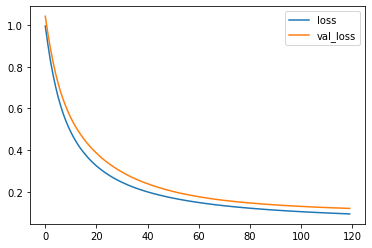

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

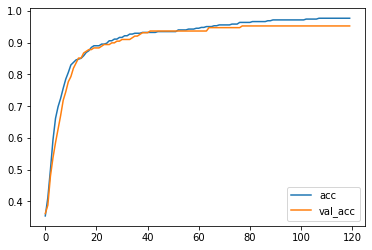

In [19]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

# Making Predictions

In [20]:
pred=model.predict(x_test)

In [21]:
pred

array([[5.85523492e-04],
       [9.52447057e-01],
       [5.02288528e-02],
       [9.90901470e-01],
       [9.13032651e-01],
       [9.64435816e-01],
       [9.85671103e-01],
       [9.97754037e-01],
       [9.63064849e-01],
       [2.38880073e-03],
       [9.91359353e-01],
       [9.98680055e-01],
       [9.94742393e-01],
       [9.87867355e-01],
       [1.16540054e-02],
       [9.82471883e-01],
       [4.98509791e-04],
       [3.86935696e-02],
       [3.73071799e-07],
       [1.86203808e-01],
       [7.51577556e-01],
       [9.97897863e-01],
       [9.92202520e-01],
       [9.90492165e-01],
       [9.11495984e-01],
       [9.88855898e-01],
       [9.16335404e-01],
       [9.47440743e-01],
       [9.88315880e-01],
       [1.60563411e-03],
       [9.98111963e-01],
       [8.54917616e-02],
       [9.59544033e-02],
       [8.40143979e-01],
       [9.91705060e-01],
       [9.46308553e-01],
       [9.76116300e-01],
       [7.47986674e-01],
       [9.88966167e-01],
       [1.43903253e-05],


In [22]:
import numpy as np

In [23]:
pred=np.round(pred).flatten()

In [24]:
pred

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1.], dtype=float32)

In [25]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 0s 122us/sample - loss: 0.1210 - accuracy: 0.9521


[0.12101960562645121, 0.95212764]

In [26]:
print(pred==y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True Fa

In [27]:
print("Manually calculated: ",np.mean(pred==y_test))

Manually calculated:  0.9521276595744681


In [29]:
model.save("C://Users/shash/Downloads/Jupyter/Tensorflow 2.0/linearclassifier.h5")

In [30]:
model=tf.keras.models.load_model("C://Users/shash/Downloads/Jupyter/Tensorflow 2.0/linearclassifier.h5")

In [31]:
print(model.layers)

In [32]:
model.evaluate(x_test,y_test)

188/188 [==============================] - 0s 721us/sample - loss: 0.1210 - accuracy: 0.9521


[0.12101960562645121, 0.95212764]